### Exercises Regression 21. Nov. 2023

> **Exersise 9** 
> Take the meteorological data set and two of the variables that seem to be linearly dependent. 
> a) Plot a scatter Plot
> b) Calculate the coefficient of correlation
> c) Plot the Residuals

***

> **Exersise 10** 
> Take the meteorological data set and determine the regression line, i.e. the intercept and the slope of the regression line.
> Predict 3 examples

***



In [46]:
import pandas as pd

df = pd.read_csv('./Tagesmittel_Dahlem.csv',  header = None, sep=';')

df.columns = ['STAT','JJJJMMDD', 'QN', 'TG', 'TN', 'TM', 'TX', 'RFM', 'FM', 'FX', 'SO', 'NM', 'RR', 'PM']
                                      
## Test:                                                                 
#df.iloc[:, 0].values

## show the first 4 rows of data of the table:
df.head(4)
df.shape


### Train und test data set
from sklearn.model_selection import train_test_split

# Let us take a sample again, this time with a sample size of n=100 
# that we split into a trainings data with 70% of the data and 
# and a test data with the 30% of the data

df_sample = df.sample(n=100, replace=False, random_state=1)

X = df_sample['SO'].values
y = df_sample['TM'].values

X2 = X
X = X.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =  0)


In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)


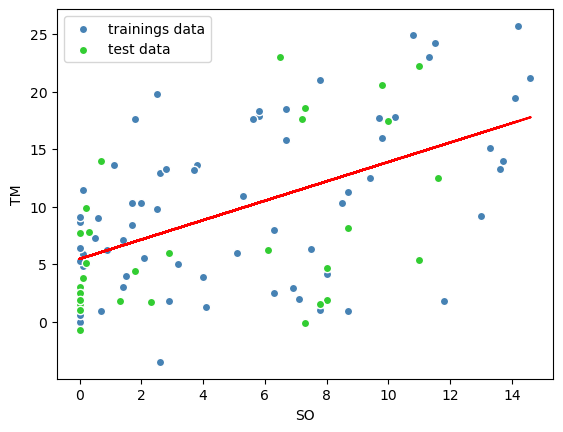

In [48]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train, c='steelblue', edgecolor = 'white',label = 'trainings data')
plt.scatter(X_test,y_test, c='limegreen', edgecolor = 'white', label = 'test data')
plt.legend(loc = 'upper left')
plt.xlabel('SO')
plt.ylabel('TM')

# linear regression line: 
plt.plot(X_train,y_train_predict, color = 'red')


In [49]:
print('Schnittpunkt y-Achse:', model.intercept_, ', Steigung:', model.coef_)

Schnittpunkt y-Achse: 5.447289989034627 , Steigung: [0.84326732]


Text(0, 0.5, 'Residuals')

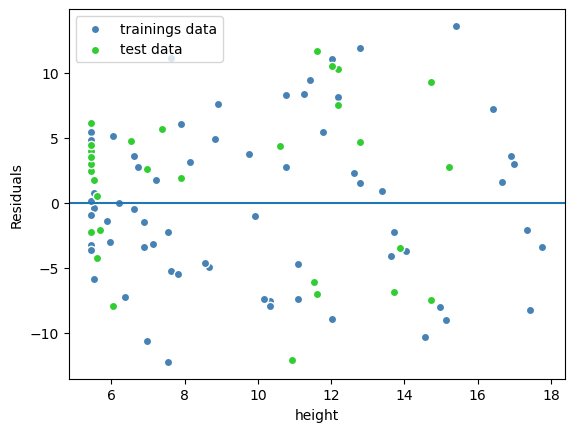

In [50]:
## Residual plot: 

plt.scatter(y_train_predict,y_train_predict - y_train, c='steelblue', edgecolor = 'white',label = 'trainings data')
plt.scatter(y_test_predict,y_test_predict - y_test, c='limegreen', edgecolor = 'white', label = 'test data')
plt.axhline(y=0)
plt.legend(loc = 'upper left')
plt.xlabel('height')
plt.ylabel('Residuals')

In [44]:
## Den Mittleren Quadratischen Fehler berechnen:

from sklearn.metrics import mean_squared_error

print('MSE train:', mean_squared_error(y_train,y_train_predict))
print('MSE test:', mean_squared_error(y_test,y_test_predict))

MSE train: 36.13659818202177
MSE test: 38.42495249212681


In [45]:
## Bestimmtheitsmaß:

from sklearn.metrics import r2_score

print('R^2 train:', r2_score(y_train,y_train_predict))
print('R^2 test:', r2_score(y_test,y_test_predict))

R^2 train: 0.286053253072895
R^2 test: 0.2222089396228244


Sowohl der Mittlere quadratische Fehler (MSE) als auch das Bestimmtheitsmaß (R^2) ist relativ hoch. Ein lineares Modell scheint nicht die optimale Lösung zu sein. 

Für den Code: Siehe Chapter 10 in Raschka und Mirjalili (2017), im ISIS unter Ankündigungen hochgeladen.